
# Derivative (미분)

미분은 함수의 변화량을 나타내는 것으로, **한 점에서의 기울기**를 의미합니다. 미분을 통해 함수의 극대점, 극소점, 변화율 등을 구할 수 있습니다.

미분의 정의는 다음과 같습니다.

$$
f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

여기서,
- $f'(x)$는 함수 $f(x)$의 미분계수를 의미합니다.
- $\Delta x$는 $x$의 변화량을 의미합니다.
- $lim_{\Delta x \to 0}$는 $\Delta x$가 0으로 수렴하는 극한값을 의미합니다.


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify


def visualize_simple():
    # plt.grid(True, alpha=0.3)
    # plt.xlabel(r"$x$")
    # plt.ylabel(r"$y$")
    # plt.legend()
    plt.show()


def visualize():
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
    plt.grid(True, alpha=0.3)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.legend()
    plt.show()


## 기울기의 의미

기울기(Slope)는 두 점 사이의 세로 변화량($\Delta y$)을 가로 변화량($\Delta x$)으로 나눈 값이다. 수식으로는 다음과 같다. m 은 기울기를 의미한다.

$$
m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}
$$

그런데 '한 점에서의 기울기'라니, 말이 안되는 것처럼 보인다. 그래프를 그려가면서 확인해보자.

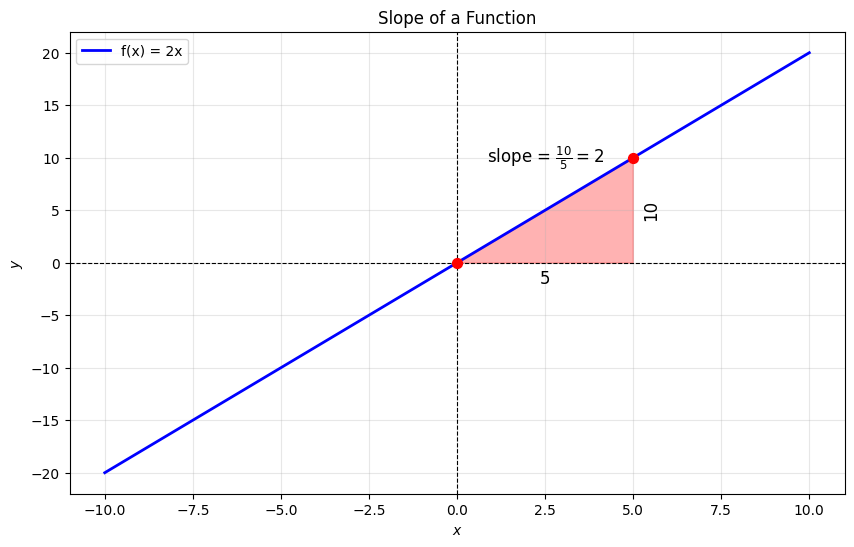

In [50]:
# 기울기에 대한 설명 그래프
# 기울기 = x의 변화량 / y의 변화량
x = np.linspace(-10, 10, 500)
y = 2 * x

x1, y1 = 0, 0
x2, y2 = 5, 10

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = 2x", color="blue", linewidth=2)
plt.title("Slope of a Function")
plt.scatter(x1, y1, color="red", s=50, zorder=5)
plt.scatter(x2, y2, color="red", s=50, zorder=5)
# 0 <= x <= 5 직선 구간을 붉게 표시하고 10 / 5 = 2로 기울기를 표시
plt.fill_between(x, y, where=(x >= 0) & (x <= 5), color="red", alpha=0.3)

# x축 범위 0 <= x <= 5에 5라는 숫자를 표시
plt.text(2.5, -1.5, '5', ha='center', va='center', fontsize=12, color='black')  # x축 아래 표시

# y축 범위 0 <= y <= 10에 10이라는 숫자를 표시
plt.text(5.5, 5, '10', ha='center', va='center', fontsize=12, color='black', rotation=90)  # y축 왼쪽 표시

# 기울기 2를 표시
plt.text(2.5, 10, r'slope = $\frac{10}{5} = 2$', ha='center', va='center', fontsize=12, color='black')

visualize()

1차 방정식은 직선이므로 쉽게 기울기를 구할 수 있다. 문제는 다항 방정식의 경우다.

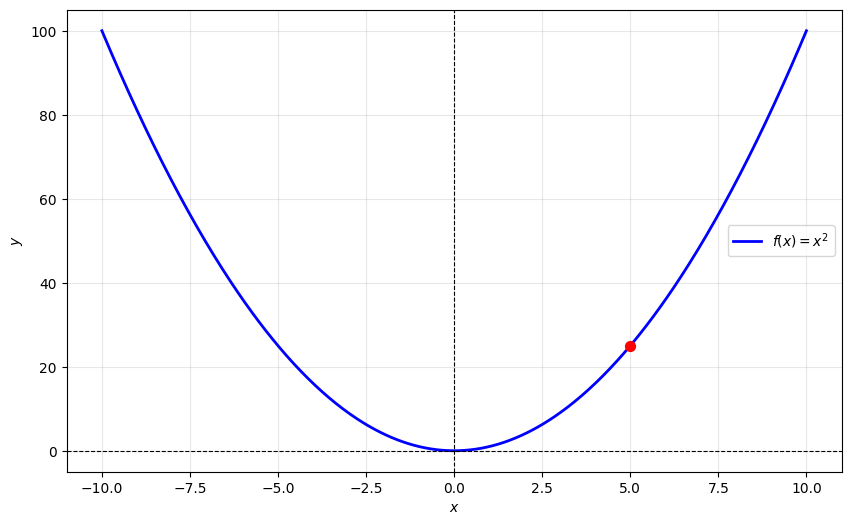

In [51]:
# 2차 방정식 그래프
x = np.linspace(-10, 10, 500)
y = x ** 2

x_target = 5
y_target = x_target ** 2

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x) = x^2$", color="blue", linewidth=2)
plt.scatter(x_target, y_target, color="red", s=50, zorder=5)

visualize()

위 2차 방정식 $f(x) = x^2$에서 $x=5$일 때의 기울기를 구하려면 어떻게 해야 할까? 점이 하나밖에 없으므로 변화율을 정의할 수 없어보인다.
미분을 사용하면 점에서의 기울기를 알아낼 수 있다.

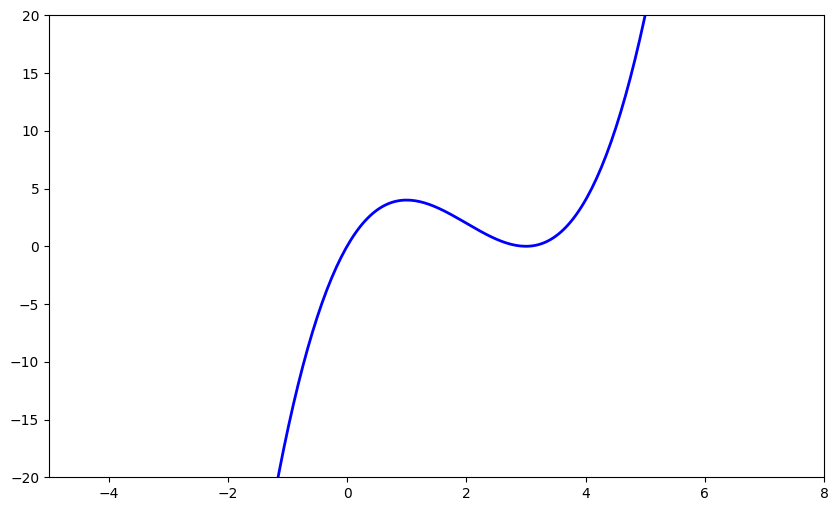

In [52]:
# TODO: 두 점이 서로 수렴할 때 점에서의 기울기를 알아낼 수 있다는 증명 그리기
x = np.linspace(-10, 10, 500)
y = x ** 3 - 6 * x ** 2 + 9 * x  # f(x) = x^3 - 6x^2 + 9x

plt.figure(figsize=(10, 6))
plt.plot(x, y, color="blue", linewidth=2)
plt.xlim(-5, 8)
plt.ylim(-20, 20)

visualize_simple()

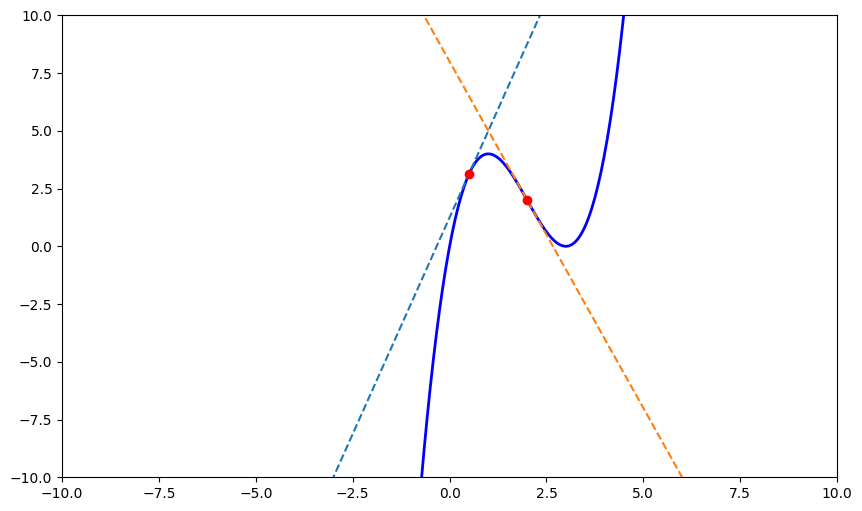

In [64]:
# 3차 함수 정의
def f(x):
    return x ** 3 - 6 * x ** 2 + 9 * x  # f(x) = x^3 - 6x^2 + 9x


# 3차 함수의 도함수 (기울기)
def f_prime(x):
    return 3 * x ** 2 - 12 * x + 9  # f'(x) = 3x^2 - 12x + 9


# 특정 x 값에서 접선의 방정식을 계산
# y = f'(x) * x + y_intercept
def tangent_line(x, x_point):
    slope = f_prime(x_point)  # 기울기
    y_intercept = f(x_point) - slope * x_point  # y절편
    return slope * x + y_intercept


# x 값의 범위와 그래프 생성
x = np.linspace(-10, 10, 500)  # x 범위 설정
y = f(x)

# 접선을 그릴 두 점
x_points = [0.5, 2]  # x 좌표
tangent_lines = [tangent_line(x, x_point) for x_point in x_points]

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x) = x^3 - 6x^2 + 9x$", color="blue", linewidth=2)

# 접선 그리기 및 접점 표시
for i, x_1 in enumerate(x_points):
    plt.plot(x, tangent_lines[i], linestyle="--", label=f"Tangent at x={x_1}")
    plt.scatter(x_1, f(x_1), color="red", zorder=5)
    # plt.text(x_point, f(x_point) + 0.5, f"({x_point}, {f(x_point):.2f})", color="black")

# 그래프 옵션 설정
plt.xlim(-10, 10)
plt.ylim(-10, 10)
visualize_simple()

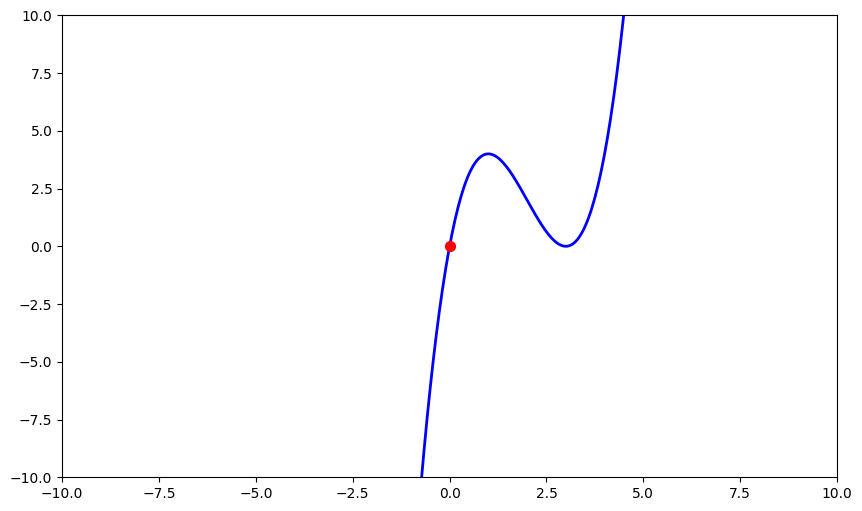

In [71]:
# numpy 사용
x = symbols('x')
func = x ** 3 - 6 * x ** 2 + 9 * x  # f(x) = x^3 - 6x^2 + 9x
func_derivative = diff(func, x)  # f'(x) = 3x^2 - 12x + 9, 미분

# NumPy 함수로 변환
f = lambdify(x, func, 'numpy')
f_prime = lambdify(x, func_derivative, 'numpy')  # 미분된 함수

# x 데이터 생성
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)

x1 = 0
y1 = f(x1)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^3 - 6x^2 + 9x$", color="blue", linewidth=2)
plt.scatter(x1, y1, color="red", s=50, zorder=5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
visualize_simple()

빨간 점에서의 기울기를 구해보자.

먼저 직선을 그리기 위해 함수 위의 임의의 점을 추가한다.

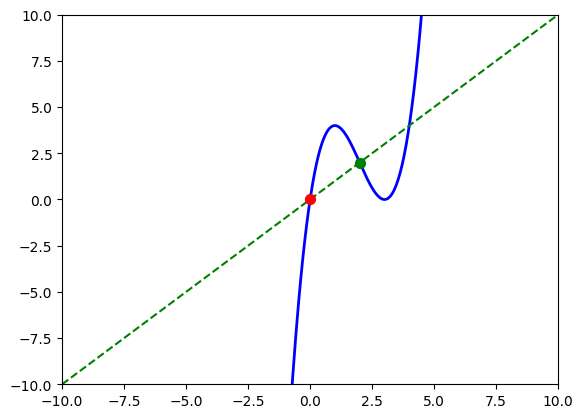

In [77]:
x2 = 2
y2 = f(x2)

plt.figure()
plt.plot(x_vals, y_vals, label=r"$f(x) = x^3 - 6x^2 + 9x$", color="blue", linewidth=2)
plt.plot(x_vals, x_vals, label="y=x", color="green", linestyle="--")

plt.scatter(x1, y1, color="red", s=50, zorder=5)
plt.scatter(x2, y2, color="green", s=50, zorder=5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
visualize_simple()

이제는 두 점을 잇는 직선을 그릴 수 있다. 함수를 보면 알 수 있듯이, 우리는 이 기울기를 평균 변화율이라고 부른다.

$$
m = \frac{y_2 - y_1}{x_2 - x_1} = \frac{\Delta y}{\Delta x} = \text{평균 변화율}
$$

그렇다면 초록 점을 약간씩 이동시키면서 점점 두 점이 수렴할 때의 기울기를 구해보자.

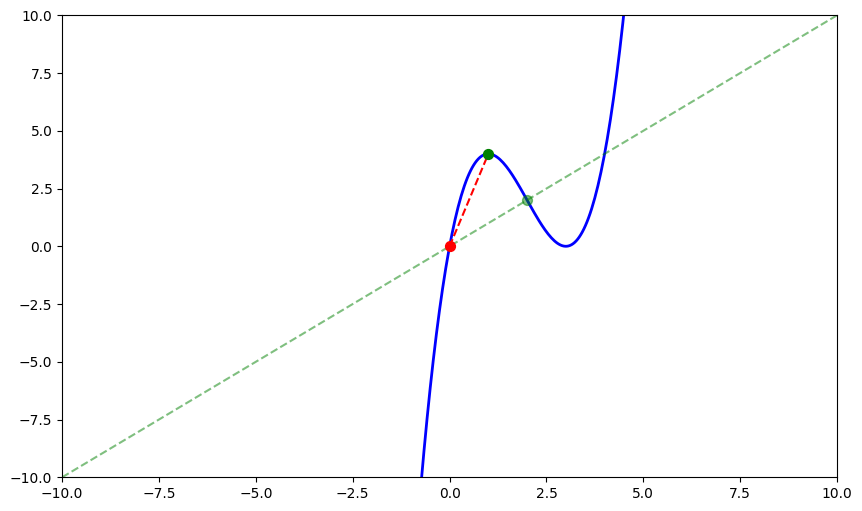

In [91]:
x3, y3 = 1, f(1)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^3 - 6x^2 + 9x$", color="blue", linewidth=2)
plt.plot(x_vals, x_vals, label="y=x", color="green", linestyle="--", alpha=0.5)
plt.plot([x1, x3], [y1, y3], color="red", linestyle="--")

plt.scatter(x1, y1, color="red", s=50, zorder=5)
plt.scatter(x2, y2, color="green", s=50, zorder=5, alpha=0.5)
plt.scatter(x3, y3, color="green", s=50, zorder=5)

plt.xlim(-10, 10)
plt.ylim(-10, 10)
visualize_simple()

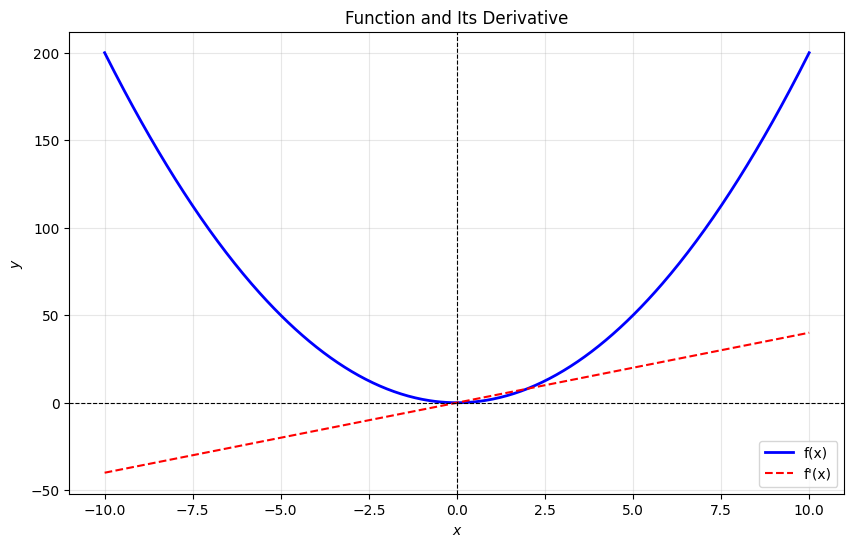

In [55]:
# 함수 정의
def f(x):
    return 2 * x ** 2


# 수치 미분 함수 정의
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h


# x 데이터 생성
x = np.linspace(-10, 10, 500)  # -10부터 10까지 500개의 점 데이터

# 함수와 미분계수 계산
y = f(x)
dy = numerical_derivative(f, x)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x)", color="blue", linewidth=2)
plt.plot(x, dy, label="f'(x)", color="red", linestyle="--")
plt.title("Function and Its Derivative")

visualize()

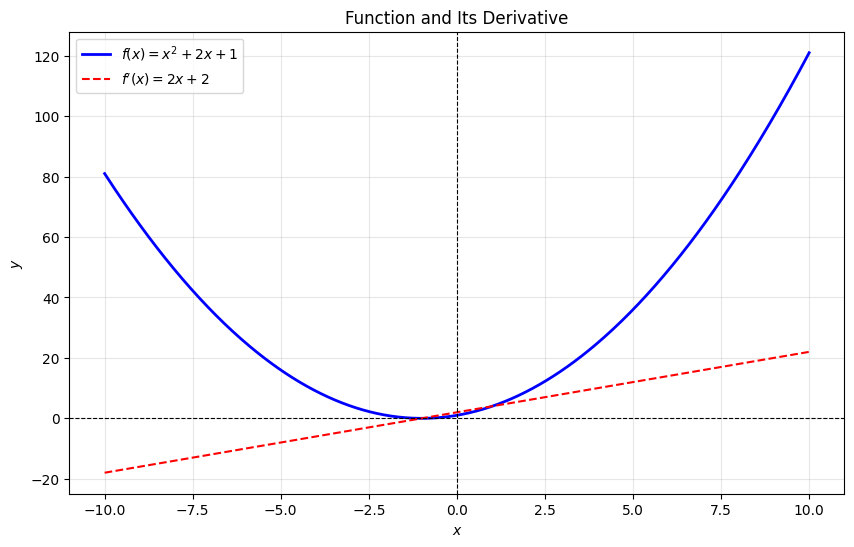

In [56]:
x = symbols('x')
func = x ** 2 + 2 * x + 1  # f(x) = x^2 + 2x + 1
func_derivative = diff(func, x)  # f'(x) = 2x + 2, 미분

# NumPy 함수로 변환
f = lambdify(x, func, 'numpy')
f_prime = lambdify(x, func_derivative, 'numpy')  # 미분된 함수

# x 데이터 생성
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)
y_prime_vals = f_prime(x_vals)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^2 + 2x + 1$", color="blue", linewidth=2)
plt.plot(x_vals, y_prime_vals, label=r"$f'(x) = 2x + 2$", color="red", linestyle="--")
plt.title("Function and Its Derivative")
plt.xlabel(r"$x$")
plt.ylabel("y")

visualize()

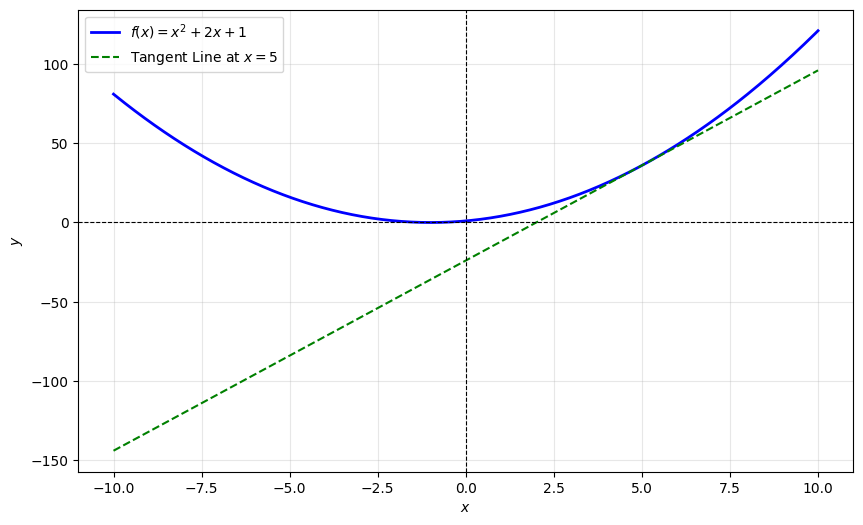

In [57]:
# 특정 점에서의 접선 표시
x_1 = 5
y_point = f(x_1)
slope = f_prime(x_1)
tangent_line = lambda x: slope * (x - x_1) + y_point  # 접선의 방정식

tangent_vals = tangent_line(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^2 + 2x + 1$", color="blue", linewidth=2)
plt.plot(x_vals, tangent_vals, label=r"Tangent Line at $x=5$", color="green", linestyle="--")

visualize()